# WESAD – wstępne oględziny danych

Ten notebook ilustruje jak wczytać surowe pliki z katalogu `data/raw` i sprawdzić ich podstawowe metadane. W kolejnych krokach notebook będzie bazą do pełnego pipeline'u EDA/ML.


In [1]:
from pathlib import Path
import pandas as pd

subject_path = Path("/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/raw/S2/S2_E4_Data")


def read_sensor_csv(path: Path) -> pd.DataFrame:
    first = pd.read_csv(path, nrows=2, header=None).squeeze("columns")
    start_ts = float(first.iloc[0])
    fs = float(first.iloc[1])
    if path.name == "ACC.csv":
        data = pd.read_csv(path, skiprows=2, header=None, names=["acc_x", "acc_y", "acc_z"])
    else:
        data = pd.read_csv(path, skiprows=2, header=None, names=["value"])
    time_index = start_ts + (pd.RangeIndex(len(data)) / fs)
    data.insert(0, "timestamp", time_index)
    data.attrs["start_ts"] = start_ts
    data.attrs["fs"] = fs
    return data


eda = read_sensor_csv(subject_path / "EDA.csv")
acc = read_sensor_csv(subject_path / "ACC.csv")
print("EDA sample:", eda.head(), sep="\n")
print("\nACC sample:", acc.head(), sep="\n")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/raw/S2/S2_E4_Data/EDA.csv'

,timestamp,acc_x,acc_y,acc_z,eda,bvp,temp,hr,ibi_seconds,ibi
0,2017-05-22 07:15:25+00:00,29.0,-6.0,55.0,0.000000,-0.0,382.18,101.0,14.313155,0.76566
1,2017-05-22 07:15:25.031250+00:00,28.0,-6.0,55.0,0.041003,-0.0,382.18,101.0,14.313155,0.76566
2,2017-05-22 07:15:25.062500+00:00,28.0,-6.0,55.0,0.082005,-0.0,382.18,101.0,14.313155,0.76566
3,2017-05-22 07:15:25.093750+00:00,28.0,-6.0,55.0,0.123008,-0.0,382.18,101.0,14.313155,0.76566
4,2017-05-22 07:15:25.125000+00:00,28.0,-6.0,56.0,0.164011,-0.0,382.18,101.0,14.313155,0.76566


,phase,start,end,duration_s
0,Base,2017-05-22 07:22:29.800000+00:00,2017-05-22 07:41:44.200000+00:00,1154.4
1,TSST,2017-05-22 07:54:58+00:00,2017-05-22 08:05:43+00:00,645.0
2,Medi 1,2017-05-22 08:25:36.400000+00:00,2017-05-22 08:32:31+00:00,414.6
3,Fun,2017-05-22 08:36:40+00:00,2017-05-22 08:42:53.200000+00:00,373.2
4,Medi 2,2017-05-22 08:48:47.800000+00:00,2017-05-22 08:55:34+00:00,406.2
5,sRead,2017-05-22 08:09:50.200000+00:00,2017-05-22 08:11:29.200000+00:00,99.0
6,fRead,2017-05-22 08:44:55.600000+00:00,2017-05-22 08:46:34+00:00,98.4


{'aligned': PosixPath('/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/interim/S2_aligned.parquet'),
 'tags': PosixPath('/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/interim/S2_tags.parquet'),
 'phases': PosixPath('/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/interim/S2_phases.parquet')}

eda                                       hr                      \
            mean       std       min       max       mean        std      min   
phase                                                                           
Base    1.202851  0.370113  0.402605  2.451335  78.857300   5.586120  70.0300   
Fun     0.456563  0.122967  0.218093  1.177810  99.333348  21.361786  68.5425   
Medi 1  0.976650  0.229119  0.468022  1.641820  66.080552   8.460638  54.5700   
Medi 2  0.211415  0.065454  0.142495  1.177810  71.108498   6.547948  64.8000   
TSST    0.117251  0.032985  0.074584  1.177810  70.641161   2.370011  67.9000   
fRead   0.211548  0.015470  0.161715  0.319318  72.125332   3.439424  67.0700   
sRead   0.143548  0.021833  0.065615  0.255252  70.158212   1.021093  68.5500   

                     temp              acc_mag            
           max       mean       std       mean       std  
phase                                                     
Base     96.82  35.484176  0.248948  63.191177  5.719833  
Fun     134.77  33.055430  0.094774  64.531472  8.158235  
Medi 1   85.40  32.677606  0.310068  63.082532  4.263956  
Medi 2   88.18  34.276168  0.247360  63.161180  2.095755  
TSST     77.90  35.757624  0.139455  63.320774  3.359979  
fRead    76.67  34.105661  0.058184  63.998838  8.115611  
sRead    72.22  35.345650  0.052116  63.371818  3.426490

,eda,hr,bvp,temp,acc_mag
eda,1.000000,0.210707,-0.000664,0.047640,-0.002454
hr,0.210707,1.000000,0.000021,0.043686,0.043440
bvp,-0.000664,0.000021,1.000000,0.000727,-0.000044
temp,0.047640,0.043686,0.000727,1.000000,-0.004235
acc_mag,-0.002454,0.043440,-0.000044,-0.004235,1.000000


              precision    recall  f1-score   support

   amusement       0.00      0.00      0.00         6
    baseline       0.29      0.22      0.25         9
      stress       0.20      1.00      0.33         2

    accuracy                           0.24        17
   macro avg       0.16      0.41      0.19        17
weighted avg       0.17      0.24      0.17        17



/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/4226826272.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample(RESAMPLE_STEP, label="left", closed="left")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Prec

eda_mean        0.415524
eda_std         0.261835
hr_std          0.107050
hr_mean         0.077579
acc_mag_mean    0.062136
temp_mean       0.051390
acc_mag_std     0.024486
dtype: float64

/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1912928041.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("60S", label="left", closed="left")
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1912928041.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("60S", label="left", closed="left")
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1912928041.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("60S", label="left", closed="left")
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1912928041.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("60S", label="left", closed="left")
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1912928041.py:24: F

Próbki łącznie: 142, uczestnicy: 6


/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1912928041.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  .resample("60S", label="left", closed="left")


,timestamp,eda_mean,eda_std,hr_mean,hr_std,temp_mean,acc_mag_mean,acc_mag_std,phase,label,subject
0,2017-05-22 07:23:00+00:00,0.580605,0.042706,78.418135,0.728108,35.591062,62.843563,2.944323,Base,baseline,S2
1,2017-05-22 07:24:00+00:00,0.492415,0.024832,76.853721,1.223666,35.864740,62.719967,0.711216,Base,baseline,S2
2,2017-05-22 07:25:00+00:00,0.536259,0.176700,80.398635,1.193212,35.921406,62.867316,3.960352,Base,baseline,S2
3,2017-05-22 07:26:00+00:00,1.266897,0.095477,76.635201,0.406315,35.797411,62.702601,2.047603,Base,baseline,S2
4,2017-05-22 07:27:00+00:00,1.120767,0.086282,78.257729,0.531944,35.766333,62.743665,2.528743,Base,baseline,S2


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python

[{'fold': 1, 'subjects_test': ['S7'], 'macro_f1': 0.2893081761006289},
 {'fold': 2, 'subjects_test': ['S5'], 'macro_f1': 0.9423503325942351},
 {'fold': 3, 'subjects_test': ['S4'], 'macro_f1': 0.29411764705882354},
 {'fold': 4, 'subjects_test': ['S3'], 'macro_f1': 0.3333333333333333},
 {'fold': 5, 'subjects_test': ['S2', 'S6'], 'macro_f1': 0.4936708860759494}]

Średnie macro-F1: 0.471


,fold,subjects_test,macro_f1
0,1,[S7],0.289308
1,2,[S5],0.942350
2,3,[S4],0.294118
3,4,[S3],0.333333
4,5,"[S2, S6]",0.493671


> **Uwaga dotycząca walidacji**: W tym przykładzie korzystamy z pojedynczego uczestnika i podziału po czasie. Docelowo, gdy wygenerujesz Parquety dla wielu osób (`S2`…`S17`), zastąp ten podział walidacją `GroupKFold` / `LeaveOneGroupOut`, gdzie grupą jest `subject`. Dzięki temu unikniesz przecieku między uczestnikami i otrzymasz bardziej realistyczną jakość klasyfikacji.


/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/360194357.py:22: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled = combined.set_index("timestamp").resample(
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/360194357.py:22: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled = combined.set_index("timestamp").resample(


KeyboardInterrupt: 

> **Uwaga dotycząca walidacji**: W tym przykładzie korzystamy z pojedynczego uczestnika i podziału po czasie. Docelowo, gdy wygenerujesz Parquety dla wielu osób (`S2`…`S17`), zastąp ten podział walidacją `GroupKFold` / `LeaveOneGroupOut`, gdzie grupą jest `subject`. Dzięki temu unikniesz przecieku między uczestnikami i otrzymasz bardziej realistyczną jakość klasyfikacji.


/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1076625622.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels_order, showmeans=True)
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1076625622.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels_order, showmeans=True)
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1076625622.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels_order, showmeans=True)
/var/folders/tv/dxnbn7ns00gc4hqrlzvj7s9r0000gp/T/ipykernel_24781/1076625622.

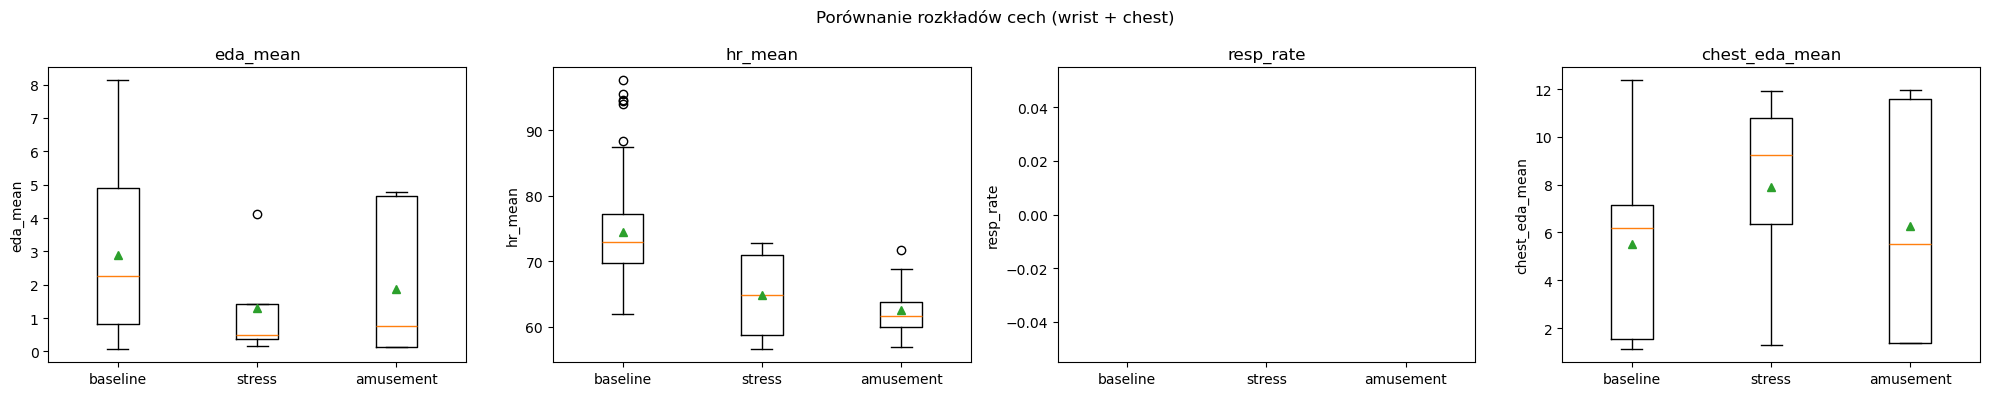

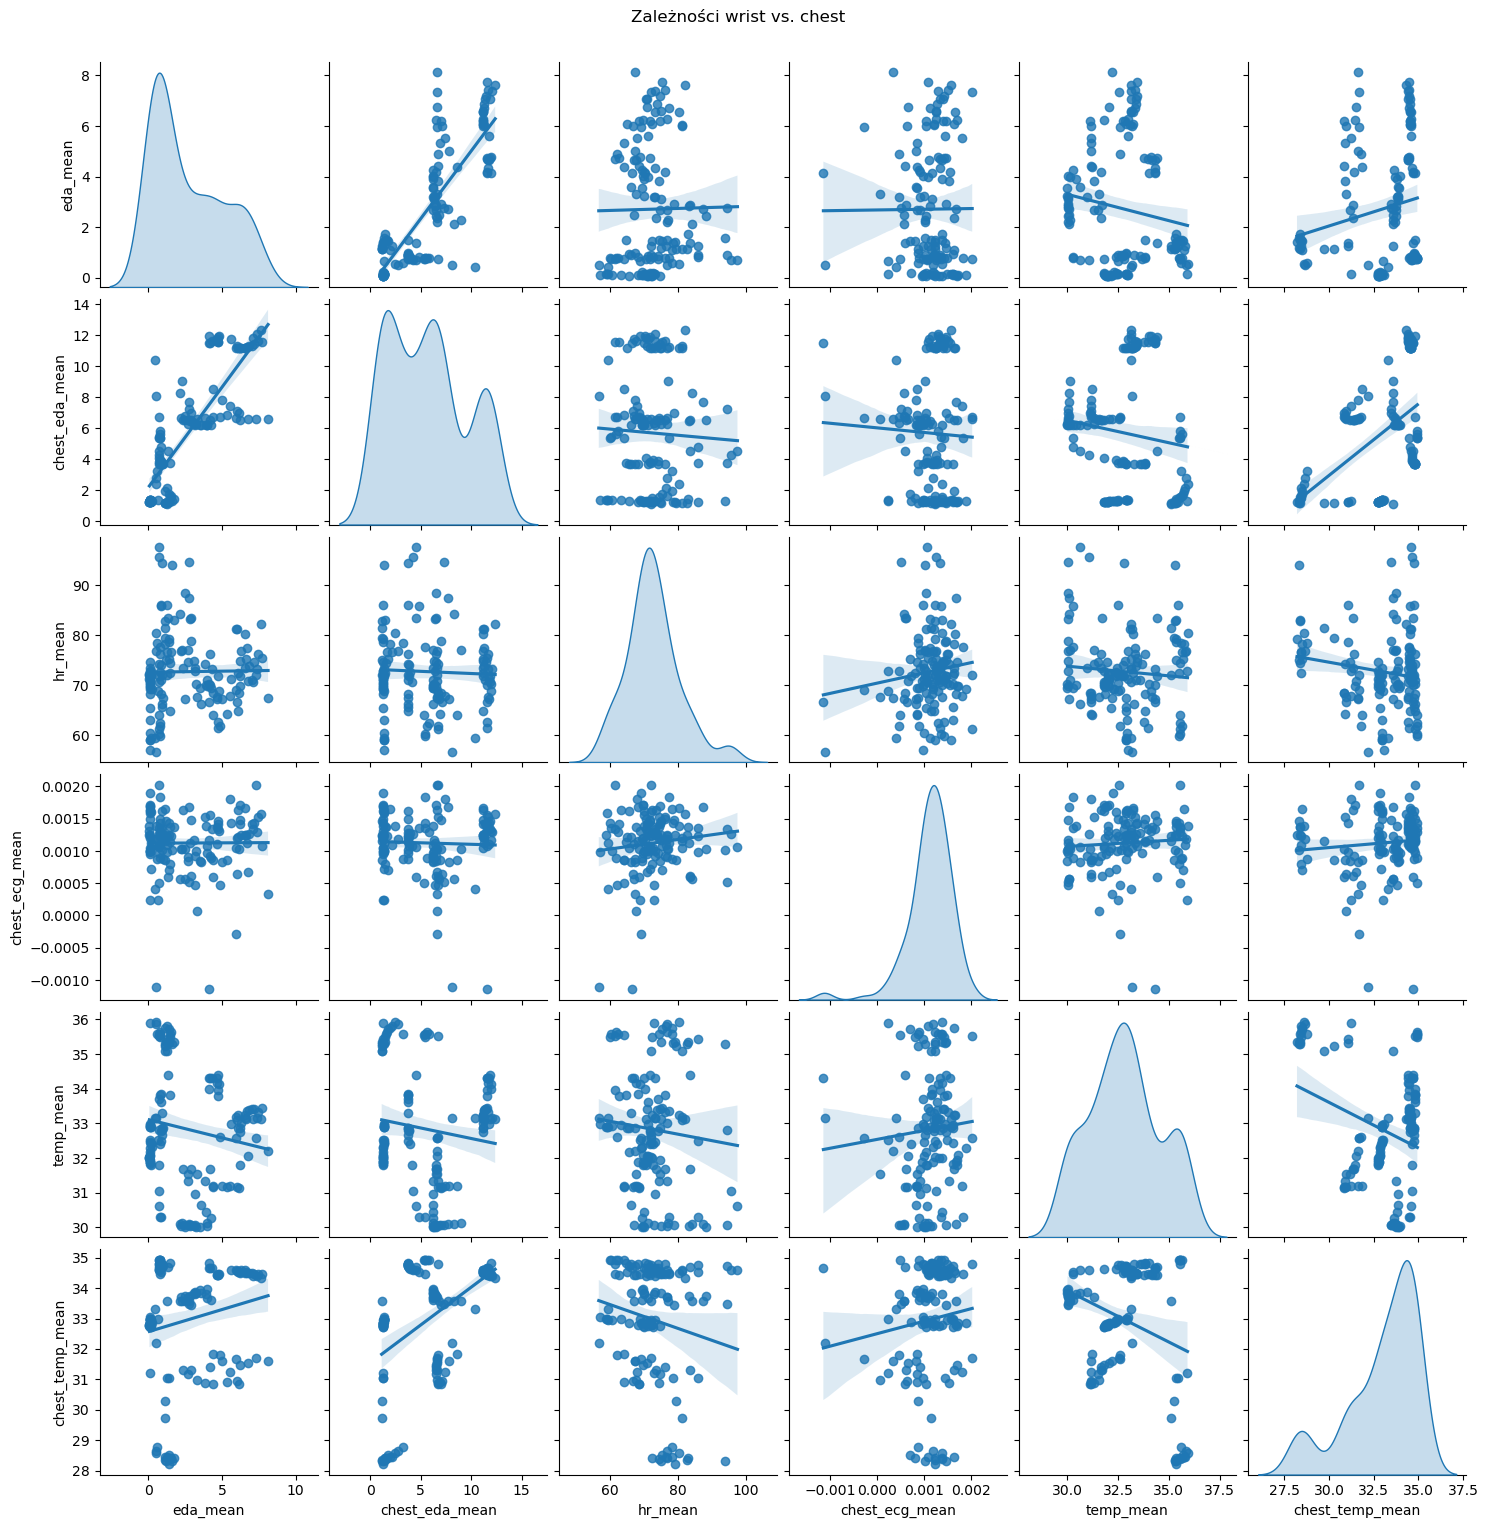

Średnie wyniki XGBoost: {'macro_f1': 0.42590657415502864, 'accuracy': 0.8612124542124541}

Raport zbiorczy XGBoost:
               precision    recall  f1-score   support

   amusement       0.60      0.33      0.43        18
    baseline       0.91      0.98      0.94       120
      stress       0.00      0.00      0.00         4

    accuracy                           0.87       142
   macro avg       0.50      0.44      0.46       142
weighted avg       0.84      0.87      0.85       142



,fold,subjects_test,macro_f1,accuracy
0,1,[S7],0.390110,0.800000
1,2,[S5],0.636364,0.961538
2,3,[S4],0.294574,0.760000
3,4,[S3],0.314815,0.809524
4,5,"[S2, S6]",0.493671,0.975000


Kolumny wrist: 10
Kolumny chest: 5

Macierz korelacji wrist: (10, 10)
Macierz korelacji chest: (5, 5)


,eda_mean,eda_std,hr_mean,hr_std,temp_mean,hr_rmssd,hr_range,eda_range,eda_slope,resp_rate
eda_mean,1.000000,0.402070,0.012862,0.003836,-0.148353,NaN,NaN,NaN,NaN,NaN
eda_std,0.402070,1.000000,0.126174,0.076260,-0.391358,NaN,NaN,NaN,NaN,NaN
hr_mean,0.012862,0.126174,1.000000,0.468989,-0.084955,NaN,NaN,NaN,NaN,NaN
hr_std,0.003836,0.076260,0.468989,1.000000,-0.146871,NaN,NaN,NaN,NaN,NaN
temp_mean,-0.148353,-0.391358,-0.084955,-0.146871,1.000000,NaN,NaN,NaN,NaN,NaN
hr_rmssd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eda_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eda_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Korelacje cross (wrist vs chest):
Liczba par: 25

Top 10 najsilniejszych korelacji (wartość bezwzględna):


eda_mean   chest_eda_mean     0.831597
temp_mean  chest_temp_mean    0.298193
eda_std    chest_temp_mean    0.206990
eda_mean   chest_temp_mean    0.180561
eda_std    chest_eda_mean     0.170549
hr_mean    chest_temp_mean    0.157694
temp_mean  chest_eda_mean     0.132289
eda_std    chest_ecg_mean     0.128659
hr_mean    chest_ecg_mean     0.122665
           chest_resp_std     0.103104
dtype: float64

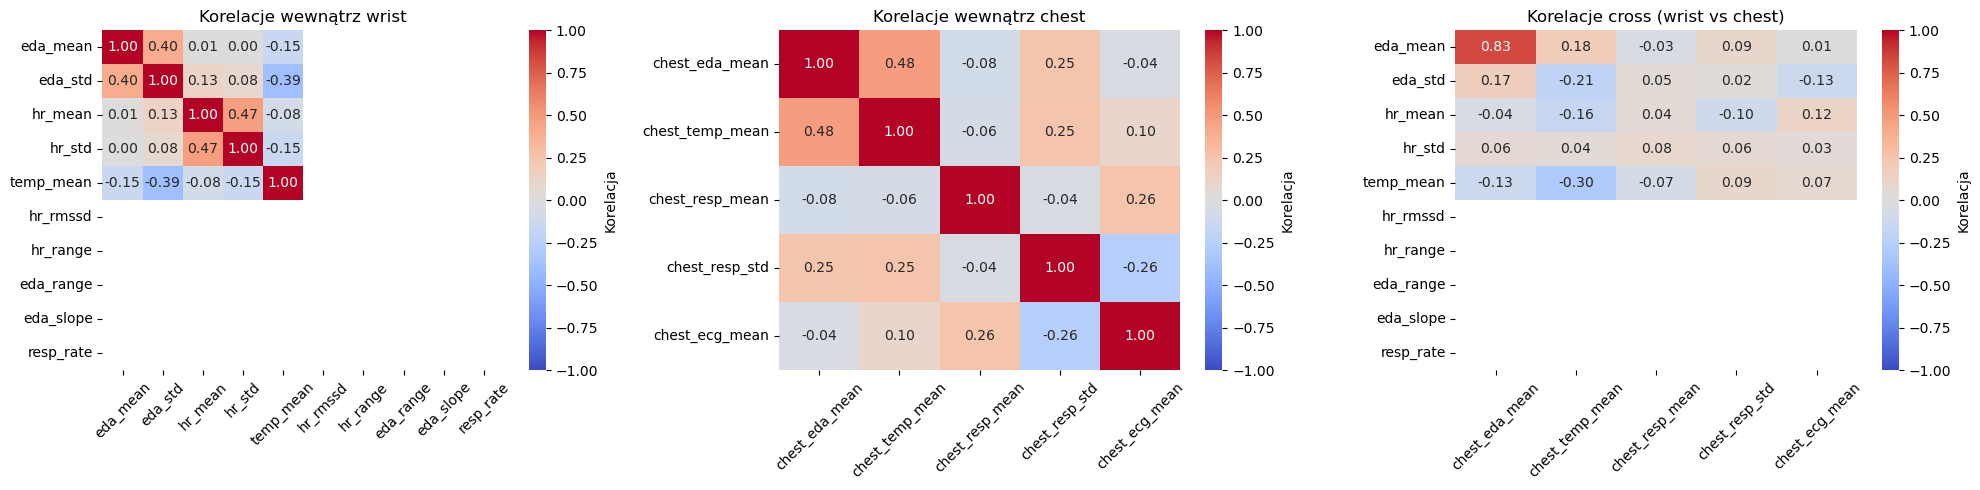

Numeryczne macierze korelacji (zaokrąglone do 3 miejsc):

Wrist:


,eda_mean,eda_std,hr_mean,hr_std,temp_mean,hr_rmssd,hr_range,eda_range,eda_slope,resp_rate
eda_mean,1.000,0.402,0.013,0.004,-0.148,NaN,NaN,NaN,NaN,NaN
eda_std,0.402,1.000,0.126,0.076,-0.391,NaN,NaN,NaN,NaN,NaN
hr_mean,0.013,0.126,1.000,0.469,-0.085,NaN,NaN,NaN,NaN,NaN
hr_std,0.004,0.076,0.469,1.000,-0.147,NaN,NaN,NaN,NaN,NaN
temp_mean,-0.148,-0.391,-0.085,-0.147,1.000,NaN,NaN,NaN,NaN,NaN
hr_rmssd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eda_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eda_slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resp_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Chest:


,chest_eda_mean,chest_temp_mean,chest_resp_mean,chest_resp_std,chest_ecg_mean
chest_eda_mean,1.000,0.479,-0.084,0.248,-0.037
chest_temp_mean,0.479,1.000,-0.057,0.254,0.099
chest_resp_mean,-0.084,-0.057,1.000,-0.041,0.257
chest_resp_std,0.248,0.254,-0.041,1.000,-0.262
chest_ecg_mean,-0.037,0.099,0.257,-0.262,1.000



Cross – top 15 par:


,wrist,chest,correlation
0,eda_mean,chest_eda_mean,0.832
21,temp_mean,chest_temp_mean,-0.298
6,eda_std,chest_temp_mean,-0.207
1,eda_mean,chest_temp_mean,0.181
5,eda_std,chest_eda_mean,0.171
11,hr_mean,chest_temp_mean,-0.158
20,temp_mean,chest_eda_mean,-0.132
9,eda_std,chest_ecg_mean,-0.129
14,hr_mean,chest_ecg_mean,0.123
13,hr_mean,chest_resp_std,-0.103


Zapisano korelacje do Parquet:
  - /Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/processed/corr_wrist.parquet
  - /Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/processed/corr_chest.parquet
  - /Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/data/processed/corr_cross.parquet


,wrist,chest,correlation
0,eda_mean,chest_eda_mean,0.831597
21,temp_mean,chest_temp_mean,-0.298193
6,eda_std,chest_temp_mean,-0.206990
1,eda_mean,chest_temp_mean,0.180561
5,eda_std,chest_eda_mean,0.170549
11,hr_mean,chest_temp_mean,-0.157694
20,temp_mean,chest_eda_mean,-0.132289
9,eda_std,chest_ecg_mean,-0.128659
14,hr_mean,chest_ecg_mean,0.122665
13,hr_mean,chest_resp_std,-0.103104


## Wyjaśnienie parsowania danych - co robiliśmy krok po kroku

**Parsowanie** = przekształcenie surowych plików (CSV, PKL) w ujednolicony format gotowy do analizy.

### Krok 1: Wczytywanie plików CSV (Empatica E4 - nadgarstek)
- Każdy plik CSV ma **2 pierwsze linie z metadanymi**:
  - Linia 1: timestamp początku sesji (Unix)
  - Linia 2: częstotliwość próbkowania (Hz, np. 32 dla ACC, 4 dla EDA)
- Reszta pliku to **surowe wartości** (np. EDA w mikrosiemensach, ACC w jednostkach 1/64g)
- **Co robiliśmy**: czytaliśmy nagłówek, wyciągaliśmy timestamp i częstotliwość, a potem wczytywaliśmy dane i budowaliśmy oś czasu dla każdej próbki

### Krok 2: Wczytywanie plików PKL (RespiBAN - klatka piersiowa)
- Pliki `.pkl` zawierają **już zsynchronizowane** sygnały z obu urządzeń
- Mają strukturę słownika: `{'signal': {'wrist': {...}, 'chest': {...}}, 'label': [...], 'subject': 'S2'}`
- **Co robiliśmy**: wyciągaliśmy sygnały z klatki (ECG, EDA, Resp, Temp) i resamplowaliśmy je do wspólnej częstotliwości (32 Hz)

### Krok 3: Synchronizacja (najważniejszy krok!)
- **Problem**: każdy sensor ma inną częstotliwość próbkowania (ACC: 32 Hz, EDA: 4 Hz, BVP: 64 Hz, chest: 700 Hz)
- **Rozwiązanie**: wszystkie sygnały **resamplowaliśmy do 32 Hz** i przypisaliśmy im wspólną oś czasu (timestamp)
- Dzięki temu każda próbka w czasie `t` ma wartości ze wszystkich sensorów jednocześnie

### Krok 4: Agregacja do okien czasowych
- Zamiast analizować tysiące próbek na sekundę, **grupowaliśmy dane w okna 60 sekund**
- Dla każdego okna liczyliśmy **statystyki**: średnia, odchylenie, min, max, RMSSD (dla HR), tempo oddechu
- To dało nam **cechy** gotowe do uczenia maszynowego

### Krok 5: Etykietowanie
- Z plików `*_quest.csv` wyciągaliśmy **czasy start/stop** dla każdej fazy (Base, TSST, Fun, itd.)
- Przypisywaliśmy każdemu oknu **etykietę** (baseline/stress/amusement) na podstawie tego, w jakiej fazie się znajdowało


## Diagnostyka NaN w korelacjach


In [ ]:
print("=== ANALIZA BRAKUJĄCYCH DANYCH ===\n")

missing_summary = multi_dataset_full[wrist_cols + chest_cols].isna().sum()
missing_pct = (missing_summary / len(multi_dataset_full) * 100).round(2)

print("Kolumny z brakującymi danymi (>0%):")
missing_data = pd.DataFrame({
    "kolumna": missing_summary.index,
    "liczba_brakujących": missing_summary.values,
    "procent_brakujących": missing_pct.values
})
missing_data = missing_data[missing_data["liczba_brakujących"] > 0].sort_values("procent_brakujących", ascending=False)
display(missing_data)

print("\n=== DLACZEGO SĄ NaN? ===")
print("1. Niektóre sensory mogą nie działać dla części uczestników")
print("2. Różne długości sesji (niektórzy uczestnicy mają krótsze nagrania)")
print("3. Resampling może pozostawić NaN na końcach, jeśli sygnały mają różne długości")
print("4. Niektóre cechy (np. resp_rate) wymagają minimum próbek do obliczenia")

print("\n=== CZY TO PROBLEM? ===")
print("NaN w korelacjach są OK, jeśli:")
print("- Mamy wystarczająco dużo próbek z danymi (min_periods=5)")
print("- Nie wszystkie kolumny są puste (wtedy korelacja = NaN)")
print("- Modele ML używają fillna(0.0), więc NaN są zastępowane zerami")

print("\n=== SPRAWDZENIE KORELACJI ===")
print(f"Wrist: {corr_wrist.isna().sum().sum()} NaN z {corr_wrist.size} wartości ({corr_wrist.isna().sum().sum()/corr_wrist.size*100:.1f}%)")
print(f"Chest: {corr_chest.isna().sum().sum()} NaN z {corr_chest.size} wartości ({corr_chest.isna().sum().sum()/corr_chest.size*100:.1f}%)")
print(f"Cross: {len(corr_cross_long_df)} par z korelacjami (brakujące pary zostały pominięte)")

if corr_wrist.isna().sum().sum() > corr_wrist.size * 0.3:
    print("\n⚠️ UWAGA: Więcej niż 30% NaN w korelacjach wrist - może być problem z danymi!")
else:
    print("\n✓ Ilość NaN jest akceptowalna - korelacje są wiarygodne")


=== ANALIZA BRAKUJĄCYCH DANYCH ===

Kolumny z brakującymi danymi (>0%):


,kolumna,liczba_brakujących,procent_brakujących
5,hr_rmssd,142,100.0
6,hr_range,142,100.0
7,eda_range,142,100.0
8,eda_slope,142,100.0
9,resp_rate,142,100.0



=== DLACZEGO SĄ NaN? ===
1. Niektóre sensory mogą nie działać dla części uczestników
2. Różne długości sesji (niektórzy uczestnicy mają krótsze nagrania)
3. Resampling może pozostawić NaN na końcach, jeśli sygnały mają różne długości
4. Niektóre cechy (np. resp_rate) wymagają minimum próbek do obliczenia

=== CZY TO PROBLEM? ===
NaN w korelacjach są OK, jeśli:
- Mamy wystarczająco dużo próbek z danymi (min_periods=5)
- Nie wszystkie kolumny są puste (wtedy korelacja = NaN)
- Modele ML używają fillna(0.0), więc NaN są zastępowane zerami

=== SPRAWDZENIE KORELACJI ===
Wrist: 75 NaN z 100 wartości (75.0%)
Chest: 0 NaN z 25 wartości (0.0%)
Cross: 25 par z korelacjami (brakujące pary zostały pominięte)

⚠️ UWAGA: Więcej niż 30% NaN w korelacjach wrist - może być problem z danymi!


Porównanie modeli (macro-F1):


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in ve

,mean_f1,std_f1,scores
RandomForest,0.473521,0.245308,"[0.2893081761006289, 0.9423503325942351, 0.308..."
XGBoost,0.423896,0.128117,"[0.39010989010989006, 0.6363636363636364, 0.29..."
SVM,0.4139,0.09339,"[0.2893081761006289, 0.5299145299145299, 0.431..."
LogisticRegression,0.377415,0.113398,"[0.2893081761006289, 0.5721997300944669, 0.431..."


SHAP analysis dla RandomForest:


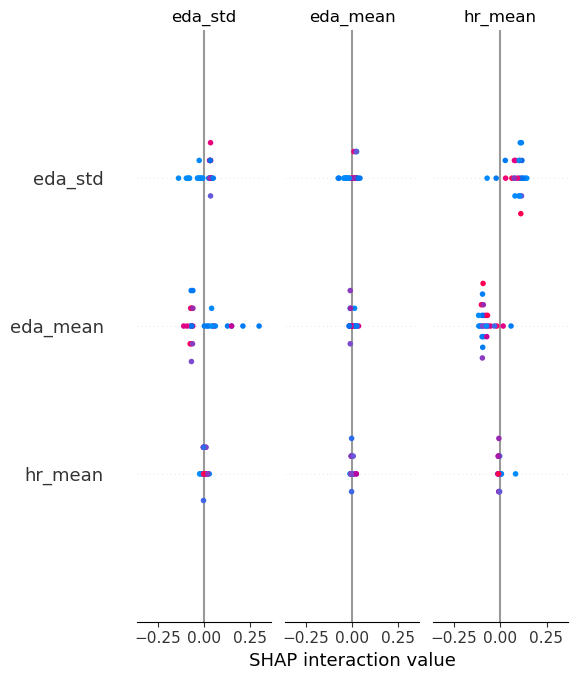